# Setup in Colab

 


## Colab Settings

In colab make sure that a GPU is available! 

Go to Edit->Notebook Settings and set Hardware Acceleration to `GPU`. 

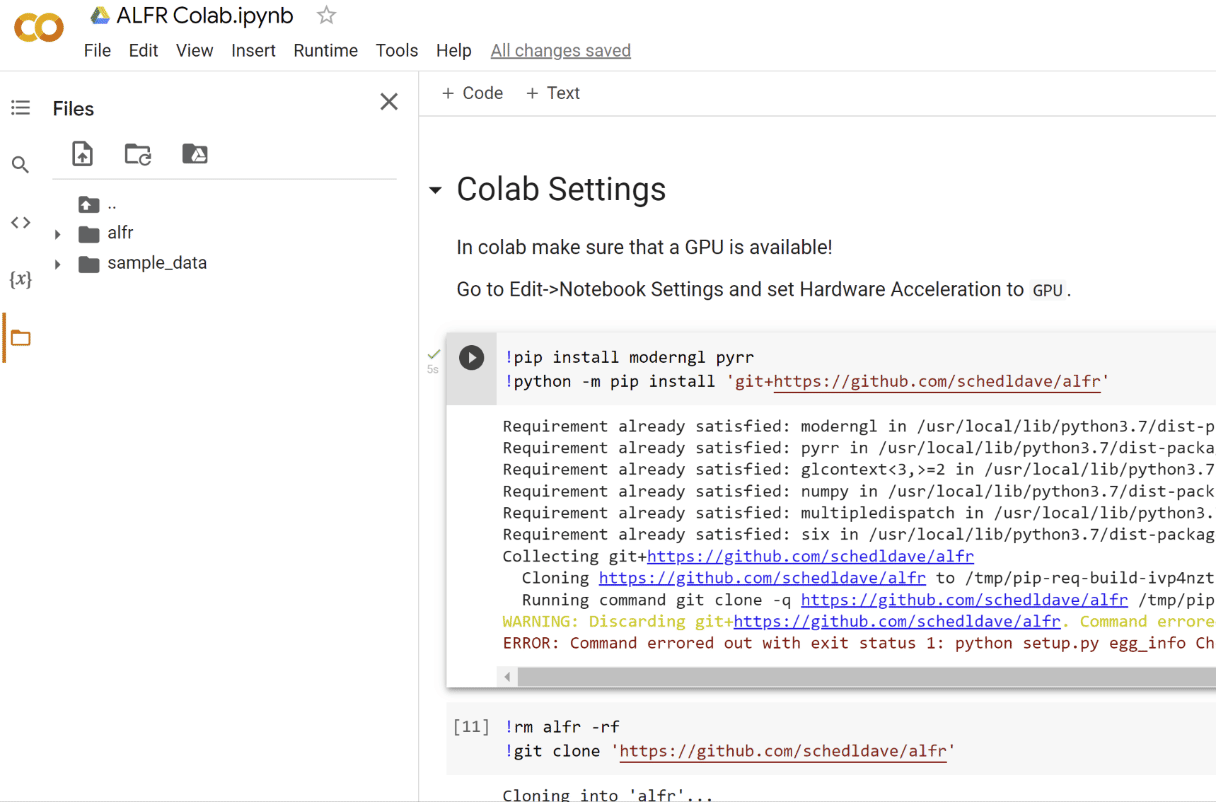


# Install ALFS 

and clone the repo (for sample data)

In [ ]:
!pip install moderngl pyrr
!python -m pip install 'git+https://github.com/bambi-eco/alfs'

In [ ]:
!rm alfr -rf
!git clone 'https://github.com/bambi-eco/alfs' 


# Usage

Load the debug_scene and render it.

In [ ]:
import alfr
# headless:
renderer = alfr.Renderer((512, 512))
camera = alfr.Camera(position=[0,1,0],camera_front=[0,0,-1],camera_up=[0,-1,0])

# load perspectives of the light field
shots = alfr.load_shots_from_json(r"./alfs/data/debug_scene/blender_poses.json", fovy=60.0)

vcam = camera
vcam = shots[0]

In [ ]:
import matplotlib.pyplot as plt

plt.imshow( vcam._img )

In [ ]:
import time 
import cv2
import numpy as np

start = time.time()
integral = renderer.integrate(shots, vcam)
end = time.time()
print(
    f"Integral (renderer) computation, {len(shots)} shots: {(end-start)*1000} milli seconds"
)

# write and display intergral (ignore alpha)
cv2.imwrite(f"integral_renderer.png", integral[:, :, :3])
plt.imshow( cv2.cvtColor(integral[:,:,:3].astype(np.uint8), cv2.COLOR_BGR2RGB ) )